In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Image Filtering

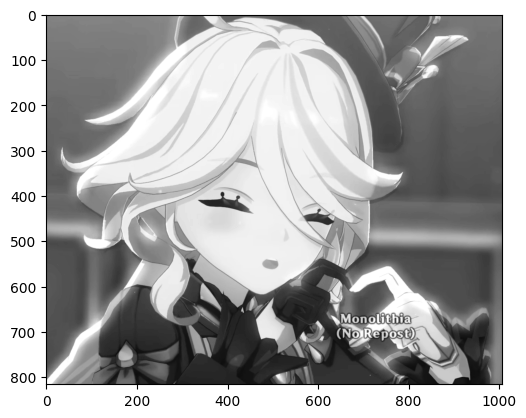

In [3]:
img = cv.imread('../furina/furina.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

greyscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot
plt.imshow(greyscale_img, cmap='grey')

In [4]:
height, width, dims = img.shape
print(f'height: {height}, width: {width}')

height: 816, width: 1006


In [5]:
sobel_kernel = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
])

# Example of what an image matrix might look like after cv.imread
example_rgb_img = np.array([
    [[152, 115, 112], [152, 115, 112], [152, 115, 112]],
    [[151, 115, 112], [151, 115, 112], [152, 115, 112]],
    [[152, 115, 112], [152, 115, 112], [152, 115, 112]]
], dtype=np.uint8)

example_gray_img = np.array([
    [152, 152, 152],
    [151, 151, 152],
    [152, 152, 152]
], dtype=np.uint8)

## Test Padding

In [6]:
height, width, channels = img.shape
pad = 1
new_height = height + 2 * pad
new_width = width + 2 * pad
#? Innitialize padding size
padded_img = np.zeros((new_height, new_width, channels), dtype=img.dtype)
# print(padded_img)

#? copy image into the center of the padding
padded_img[pad:height+pad, pad:width+pad, :] = img
print(padded_img.shape) # (818, 1008, 3)
print(img.shape) # (816, 1006, 3) -> padding add to both left and right, top and bottom of the image

(818, 1008, 3)
(816, 1006, 3)


In [7]:
5 // 2 

2

## RGB Image Sobel Filtering

In [ ]:
def filtering_rgb(img, kernel):
    #? 1. Get image and kernel shapes
    height, width, channels = img.shape
    k_h, k_w = kernel.shape  # e.g., (3, 3)
    
    #? 2. Pad the image
    pad_h = k_h // 2  # e.g. 3 // 2 = 1, 5 // 3 = 2 if k_h=3
    pad_w = k_w // 2
    new_height = height + 2 * pad_h
    new_width = width + 2 * pad_w
    
    # Initialize padded image
    padded_img = np.zeros((new_height, new_width, channels), dtype=img.dtype)
    padded_img[pad_h:pad_h+height, pad_w:pad_w+width, :] = img
    
    #? 3. Create output array
    # zeros_like: Return an array of zeros with the same shape and type as a given array
    filtered_img = np.zeros_like(img, dtype=np.float32)
    
    #? 4. Convolution-like operation
    for i in range(height): # rows
        for j in range(width): # cols
            for c in range(channels): # color in color_channel
                # local region in padded image
                region = padded_img[i : i + k_h, j : j + k_w, c] # region_size == kernel_size
                
                # element-wise multiply and sum
                value = np.sum(region * kernel)
                
                # assign to output
                filtered_img[i, j, c] = value 
    
    return filtered_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-758.0..892.0].


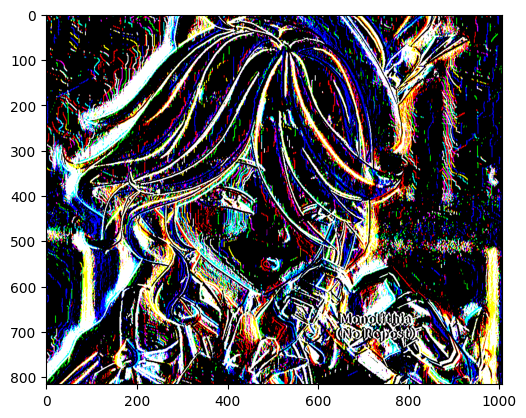

In [9]:
filter_img = filtering_rgb(img, sobel_kernel)
plt.imshow(filter_img)

In [10]:
height, width = greyscale_img.shape
pad = 1
new_height = height + 2 * pad
new_width = width + 2 * pad
#? Innitialize padding size
padded_img = np.zeros((new_height, new_width), dtype=greyscale_img.dtype)
# print(padded_img)

#? copy image into the center of the padding
padded_img[pad:height+pad, pad:width+pad] = greyscale_img
print(greyscale_img.shape) # (816, 1006, 3) 
print(padded_img.shape) # (818, 1008, 3) -> padding add to both left and right, top and bottom of the image

(816, 1006)
(818, 1008)


## Gray Scale Image Sobel Filtering

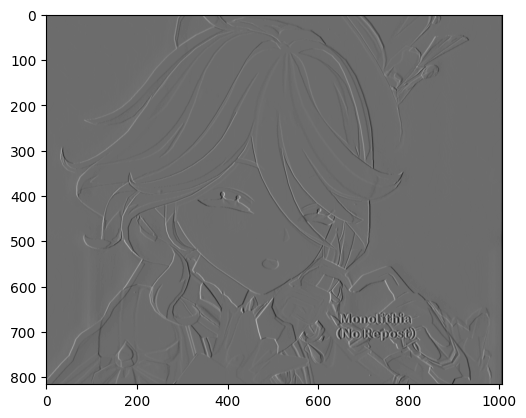

In [11]:
#TODO: Add Stride
def filtering_grayscale(img, kernel): 
    #? 1. Get image and kernel shapes
    height, width = img.shape
    k_h, k_w = kernel.shape  # e.g., (3, 3)
    
    #? 2. Pad the image
    pad_h = k_h // 2  # e.g. 3 // 2 = 1 if k_h=3
    pad_w = k_w // 2
    new_height = height + 2*pad_h # add to 2 size horizontally    
    new_width = width + 2*pad_w  # add to 2 size vertically
    
    # Initialize padded image
    padded_img = np.zeros((new_height, new_width), dtype=img.dtype)
    padded_img[pad_h:pad_h+height, pad_w:pad_w+width] = img
    
    #? 3. Create output array
    # zeros_like: Return an array of zeros with the same shape and type as a given array
    filtered_img = np.zeros_like(img, dtype=np.float32)
    
    #? 4. Convolution-like operation
    for i in range(height): # rows
        for j in range(width): # cols
            # local region in padded image
            region = padded_img[i : i + k_h, j : j + k_w] # region_size == kernel_size
            
            # element-wise multiply and sum
            value = np.sum(region * kernel)
            
            # assign to output
            filtered_img[i, j] = value 
    
    return filtered_img

filter_grey = filtering_grayscale(greyscale_img, sobel_kernel)
plt.imshow(filter_grey, cmap='gray')

## 1. Averaging 
Blur the image as a Whole

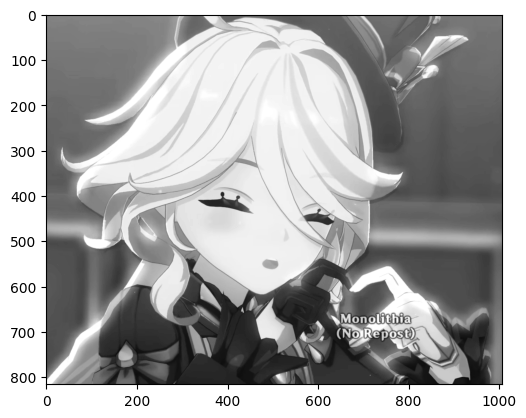

In [12]:
kernel = np.ones((5,5),np.float32)/25
filter_grey = filtering_grayscale(greyscale_img, kernel)

# Create subplot
plt.imshow(filter_grey, cmap='gray')

In [ ]:
plt.imshow(greyscale_img, cmap='gray')

## 2. Gaussian Blurring
Blur Neighbooring $k \times k$ Pixel for each Pixel

![](../Resources/GaussianDistribution.png)

In [ ]:
import numpy as np
#! Explain later 
def gaussian_kernel(k, sigma=1.0):
    """
        Creates a 2D Gaussian kernel array with size k x k and standard deviation sigma.
    """
    # Ensure k is odd
    assert k % 2 == 1, "Kernel size must be odd"
    
    # Coordinate grid (centered at 0,0)
    half = k // 2
    x, y = np.meshgrid(np.arange(-half, half+1), np.arange(-half, half+1))
    
    # Compute the 2D Gaussian
    g = (1.0 / (2.0 * np.pi * sigma**2)) * np.exp(- (x**2 + y**2) / (2.0 * sigma**2))
    
    # Normalize so the sum of all elements is 1
    g /= g.sum()
    return g


### Explain later

In [14]:
def gaussian_blur(img, k=5, sigma=1.0):
    """
    Blurs an image (grayscale or color) using a Gaussian kernel of size k x k
    and standard deviation sigma.
    """
    # 1. Create Gaussian kernel
    kernel = gaussian_kernel(k, sigma)
    
    # If image is grayscale
    if len(img.shape) == 2:
        return filtering_grayscale(img, kernel)
    
    # If image is color (H x W x 3)
    elif len(img.shape) == 3:
        height, width, channels = img.shape
        
        # Output container
        blurred = np.zeros_like(img, dtype=np.float32)
        
        # Pad each channel and convolve
        for c in range(channels):
            blurred[..., c] = filtering_grayscale(img[..., c], kernel)
        
        return blurred
    else:
        raise ValueError("Unsupported image dimensions!")

In [15]:
new_img = cv.imread('../furina/blackLotus.png')

In [16]:
blurred_img = gaussian_blur(new_img, k=7, sigma=5.0)

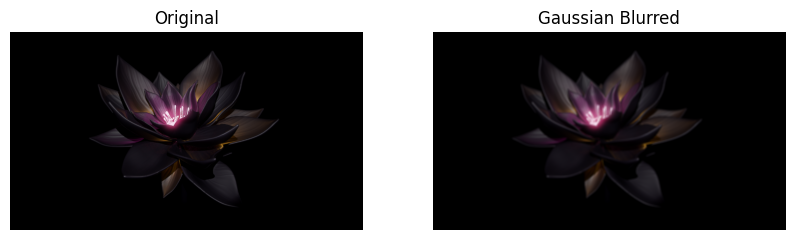

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(new_img)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(np.clip(blurred_img, 0, 255).astype('uint8'))
axes[1].set_title('Gaussian Blurred')
axes[1].axis('off')
plt.show()

### Otsu's Method